In [37]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

standard_flag = False

In [38]:
df = pd.read_excel('all_label.xlsx', header=None)
train_data = df.iloc[:, :8].values  # 前八列
train_labels = df.iloc[:, 8].values  # 第九列

In [39]:
from sklearn.preprocessing import StandardScaler
# 数据标准化
if standard_flag:
    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)
    train_data

train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
train_data

tensor([[1.1923e-01, 1.6842e-01, 1.1896e-01, 1.6896e-01, 1.1912e-01, 1.6883e-01,
         1.1879e-01, 1.6867e-01],
        [1.1547e-01, 1.6174e-01, 8.7238e-04, 2.2142e-03, 3.1311e-04, 1.1397e-03,
         8.0163e-04, 2.4164e-03],
        [8.2309e-04, 2.6797e-03, 1.1553e-01, 1.6240e-01, 8.5387e-04, 2.1121e-03,
         3.7647e-04, 1.0415e-03],
        [1.5469e-04, 1.1588e-03, 8.4560e-04, 2.5460e-03, 1.1536e-01, 1.6248e-01,
         9.5096e-04, 1.9165e-03],
        [7.2899e-04, 2.2002e-03, 5.4322e-04, 1.2169e-03, 8.4780e-04, 2.4249e-03,
         1.1474e-01, 1.6208e-01],
        [1.1923e-01, 1.6874e-01, 1.1892e-01, 1.6925e-01, 1.1878e-01, 1.6942e-01,
         1.1884e-01, 1.6910e-01],
        [1.2167e-01, 1.7367e-01, 4.0926e-02, 8.0166e-04, 1.2165e-05, 6.5197e-04,
         1.5521e-03, 3.2137e-02],
        [1.7011e-03, 3.2508e-02, 1.2162e-01, 1.7462e-01, 4.0190e-02, 4.5283e-04,
         1.1634e-04, 9.9124e-04],
        [5.3251e-04, 1.4664e-03, 1.3997e-03, 3.3054e-02, 1.2108e-01, 1.7416e-01,

# 训练

In [40]:
class MyResNet(nn.Module):
    def __init__(self, num_features, hidden_size, num_classes):
        super(MyResNet, self).__init__()
        self.input_layer = nn.Linear(num_features, hidden_size)
        self.residual_block = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, hidden_size),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.residual_block(x) + x  # 残差连接
        x = nn.ReLU()(x)
        x = self.output_layer(x)
        return x

num_features = 8  # 输入特征
hidden_size = 128
num_classes = 9  # 输出类别

learning_rate = 0.001  # 学习率
num_epochs = 2000  # 训练轮数

model = MyResNet(num_features, hidden_size, num_classes)
model

MyResNet(
  (input_layer): Linear(in_features=8, out_features=128, bias=True)
  (residual_block): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
  )
  (output_layer): Linear(in_features=128, out_features=9, bias=True)
)

In [41]:
# 观察每一层的特征变化
input_tensor = torch.randn(90, num_features)
print("Input tensor shape:", input_tensor.shape)

x = input_tensor
x = model.input_layer(x)
print("After input layer:", x.shape)

x = model.residual_block(x) + x
print("After residual block:", x.shape)

x = nn.ReLU()(x)
print("After ReLU activation:", x.shape)

x = model.output_layer(x)
print("After output layer:", x.shape)

Input tensor shape: torch.Size([90, 8])
After input layer: torch.Size([90, 128])
After residual block: torch.Size([90, 128])
After ReLU activation: torch.Size([90, 128])
After output layer: torch.Size([90, 9])


In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_history = []

total_steps = len(train_data)
for epoch in range(num_epochs):   
    for i in range(total_steps): 
        outputs = model(train_data)
        loss = criterion(outputs, train_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_history.append(loss.item())
    print(f"Epoch {epoch+1}: Loss={loss.item()}")

Epoch 1: Loss=2.0490922927856445
Epoch 2: Loss=2.0087766647338867
Epoch 3: Loss=1.9851956367492676
Epoch 4: Loss=1.9679889678955078
Epoch 5: Loss=1.954021692276001
Epoch 6: Loss=1.9420078992843628
Epoch 7: Loss=1.9312771558761597
Epoch 8: Loss=1.92147958278656
Epoch 9: Loss=1.912395715713501
Epoch 10: Loss=1.903865933418274
Epoch 11: Loss=1.8957494497299194
Epoch 12: Loss=1.8880091905593872
Epoch 13: Loss=1.880602478981018
Epoch 14: Loss=1.8735063076019287
Epoch 15: Loss=1.866644263267517
Epoch 16: Loss=1.8599975109100342
Epoch 17: Loss=1.8535550832748413
Epoch 18: Loss=1.8472933769226074
Epoch 19: Loss=1.8411868810653687
Epoch 20: Loss=1.8352214097976685
Epoch 21: Loss=1.82936692237854
Epoch 22: Loss=1.8236035108566284
Epoch 23: Loss=1.8179585933685303
Epoch 24: Loss=1.8124313354492188
Epoch 25: Loss=1.8070095777511597
Epoch 26: Loss=1.8016575574874878
Epoch 27: Loss=1.7963787317276
Epoch 28: Loss=1.791179895401001
Epoch 29: Loss=1.7860419750213623
Epoch 30: Loss=1.7809540033340454
Ep

In [43]:
for i in loss_history:
    print(i)

2.0490922927856445
2.0087766647338867
1.9851956367492676
1.9679889678955078
1.954021692276001
1.9420078992843628
1.9312771558761597
1.92147958278656
1.912395715713501
1.903865933418274
1.8957494497299194
1.8880091905593872
1.880602478981018
1.8735063076019287
1.866644263267517
1.8599975109100342
1.8535550832748413
1.8472933769226074
1.8411868810653687
1.8352214097976685
1.82936692237854
1.8236035108566284
1.8179585933685303
1.8124313354492188
1.8070095777511597
1.8016575574874878
1.7963787317276
1.791179895401001
1.7860419750213623
1.7809540033340454
1.7759151458740234
1.7709307670593262
1.7659991979599
1.7611353397369385
1.756309986114502
1.7515318393707275
1.7468066215515137
1.742118000984192
1.7374688386917114
1.7328546047210693
1.7282710075378418
1.7237070798873901
1.7191804647445679
1.7146891355514526
1.7102400064468384
1.7058274745941162
1.7014493942260742
1.6970900297164917
1.6927268505096436
1.6883809566497803
1.6840687990188599
1.6798168420791626
1.6755897998809814
1.671376705

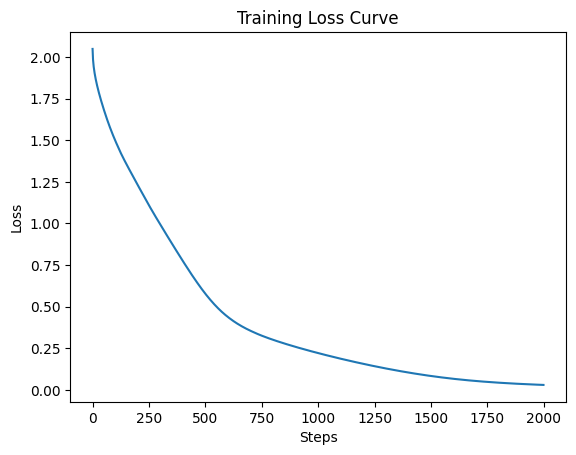

In [44]:
plt.plot(loss_history)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

In [45]:
torch.save(model.state_dict(), 'resnet_8class_best.params')

# 测试

In [46]:
data_test = pd.read_excel("test_label.xlsx", header=None)
test_x = np.array(data_test.iloc[:, 0:8])
test_y = np.array(data_test.iloc[:, 8])

# 数据标准化
if standard_flag:
    scaler = StandardScaler()
    test_data = scaler.fit_transform(test_x)

test_data = torch.tensor(test_x, dtype=torch.float32)
test_labels = torch.tensor(test_y, dtype=torch.long)

# 评估模式
clone = MyResNet(num_features=num_features, hidden_size=hidden_size, num_classes=num_classes)
clone.load_state_dict(torch.load('resnet_8class_best.params'))
clone.eval()
with torch.no_grad():
    # 预测测试数据
    outputs = clone(test_data)
    _, predicted = torch.max(outputs.data, 1)
    for i in range(len(test_data)):
        print(f"Predicted: {predicted[i]}, Actual: {test_labels[i]}")

    # 计算准确率
    correct = (predicted == test_labels).sum().item()
    total = len(test_data)
    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100}%")

Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 2, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 2, Actual: 1
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 1, Actual: 2
Predicted: 2, Actual: 2
Predicted: 4, Actual: 3
Predicted: 3, Actual: 3
Predicted: 3, Actual: 3
Predicted: 4, Actual: 3
Predicted: 4, Actual: 4
Predicted: 3, Actual: 4
Predicted: 3, Actual: 4
Predicted: 4, Actual: 4
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 5, Actual: 6
Predicted: 6, Actual: 6
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Accuracy: 77.77777777777779%


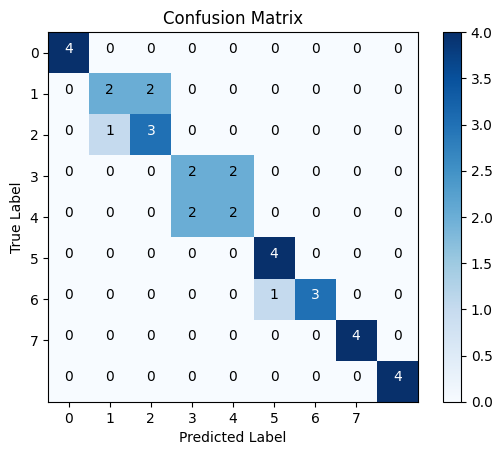

In [47]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(test_labels, predicted)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
classes = ['0', '1', '2', '3', '4', '5', '6', '7']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [48]:
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 计算分类报告
report = classification_report(test_labels, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      0.50      0.57         4
           2       0.60      0.75      0.67         4
           3       0.50      0.50      0.50         4
           4       0.50      0.50      0.50         4
           5       0.80      1.00      0.89         4
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4

    accuracy                           0.78        36
   macro avg       0.79      0.78      0.78        36
weighted avg       0.79      0.78      0.78        36

